In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

In [2]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

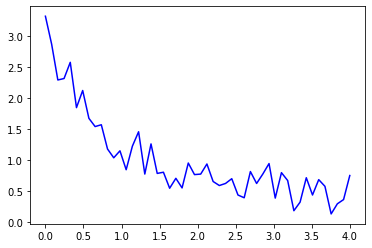

In [3]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

In [ ]:
# Fit for the parameters a, b, c of the function func:

In [5]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.63329121, 1.38231211, 0.52924671])

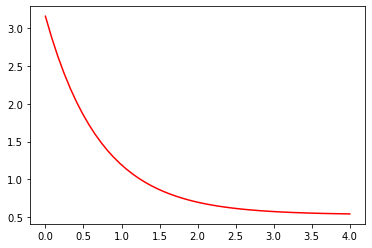

In [6]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [7]:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt

array([2.50275278, 1.        , 0.39328362])

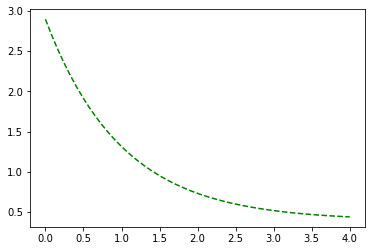

In [8]:
plt.plot(xdata, func(xdata, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

No handles with labels found to put in legend.


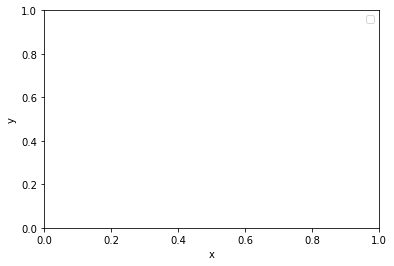

In [9]:
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Sine function coefficients:
[3.48196872 1.33474068]
Covariance of coefficients:
[[ 2.88442121e-02 -3.02654697e-05]
 [-3.02654697e-05  6.07860209e-05]]


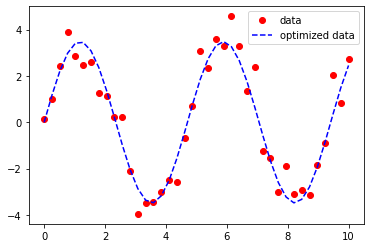

In [11]:
import numpy as np

# curve-fit() function imported from scipy
from scipy.optimize import curve_fit

from matplotlib import pyplot as plt

# numpy.linspace with the given arguments
# produce an array of 40 numbers between 0
# and 10, both inclusive
x = np.linspace(0, 10, num = 40)


# y is another array which stores 3.45 times
# the sine of (values in x) * 1.334.
# The random.normal() draws random sample
# from normal (Gaussian) distribution to make
# them scatter across the base line
y = 3.45 * np.sin(1.334 * x) + np.random.normal(size = 40)

# Test function with coefficients as parameters
def test(x, a, b):
    return a * np.sin(b * x)

# curve_fit() function takes the test-function
# x-data and y-data as argument and returns
# the coefficients a and b in param and
# the estimated covariance of param in param_cov
param, param_cov = curve_fit(test, x, y)


print("Sine function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

# ans stores the new y-data according to
# the coefficients given by curve-fit() function
ans = (param[0]*(np.sin(param[1]*x)))

'''Below 4 lines can be un-commented for plotting results
using matplotlib as shown in the first example. '''

plt.plot(x, y, 'o', color ='red', label ="data")
plt.plot(x, ans, '--', color ='blue', label ="optimized data")
plt.legend()
plt.show()


In [12]:
x = np.linspace(0, 1, num = 40)
 
y = 3.45 * np.exp(1.334 * x) + np.random.normal(size = 40)
 
def test(x, a, b):
    return a*np.exp(b*x)
 
param, param_cov = curve_fit(test, x, y)

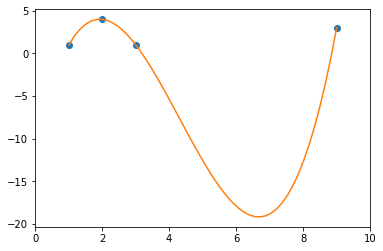

In [13]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([(1, 1), (2, 4), (3, 1), (9, 3)])
# get x and y vectors
x = points[:,0]
y = points[:,1]

# calculate polynomial
z = np.polyfit(x, y, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

In [14]:
import numpy as np
from scipy.optimize import curve_fit

x = np.array([1, 2, 3, 9])
y = np.array([1, 4, 1, 3])

def fit_func(x, a, b):
    return a*x + b

params = curve_fit(fit_func, x, y)

[a, b] = params[0]

In [15]:
%matplotlib inline

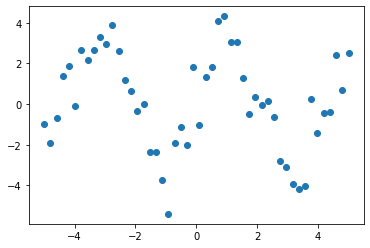

In [16]:
import numpy as np

# Seed the random number generator for reproducibility
np.random.seed(0)

x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

# And plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data)

In [17]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)

[3.05931973 1.45754553]


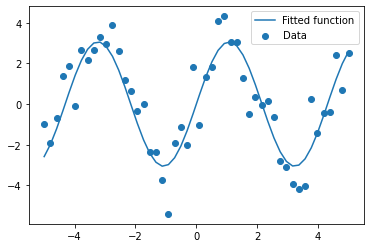

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()

In [ ]:
## https://www.datatechnotes.com/2020/09/curve-fitting-with-curve-fit-function-in-python.html

In [20]:
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

In [21]:
y = array([12,11,13,15,16,16,15,14,15,12,11,12,8,10,9,7,6]) 
x = array(range(len(y)))


*  Next, we'll define multiple functions to use in curve_fit() function and check their differences in fitting. You can also add or change the equations to get the best fitting parameters for your data. 

    We use below equations as the fitting functions.

 *           y = ax^2 + bx + c

 *           y = ax^3 + bx + c

  *          y = ax^3 + bx^2 + c

  *          y = a*exp(bx) + c

We can write them in python as below.

In [22]:
def func1(x, a, b, c):
    return a*x**2+b*x+c

def func2(x, a, b, c):
    return a*x**3+b*x+c

def func3(x, a, b, c):
    return a*x**3+b*x**2+c

def func4(x, a, b, c):
    return a*exp(b*x)+c 

*  Fitting the data with curve_fit is easy, providing fitting function,  x and y data is enough to fit the data. The curve_fit() function returns an optimal parameters and estimated covariance values as an output.

In [23]:

 params, covs = curve_fit(func1, x, y)

In [24]:
params, _ = curve_fit(func1, x, y)
a, b, c = params[0], params[1], params[2]
yfit1 = a*x**2+b*x+c

params, _  = curve_fit(func2, x, y)
a, b, c = params[0], params[1], params[2]
yfit2 = a*x**3+b*x+c

params, _  = curve_fit(func3, x, y)
a, b, c = params[0], params[1], params[2]
yfit3 = a*x**3+b*x**2+c

params, _  = curve_fit(func4, x, y)
a, b, c = params[0], params[1], params[2]
yfit4 = a*exp(x*b)+c
  

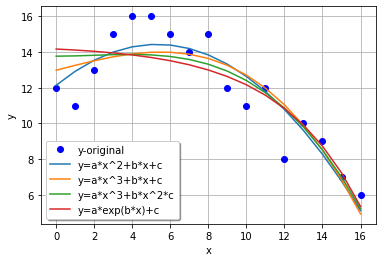

In [25]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.plot(x, yfit2, label="y=a*x^3+b*x+c")
plt.plot(x, yfit3, label="y=a*x^3+b*x^2*c")
plt.plot(x, yfit4, label="y=a*exp(b*x)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

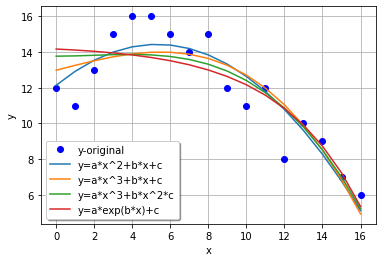

In [26]:
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

y = array([12, 11, 13, 15, 16, 16, 15, 14, 15, 12, 11, 12, 8, 10, 9, 7, 6])
x = array(range(len(y)))

def func1(x, a, b, c):
    return a*x**2+b*x+c

def func2(x, a, b, c):
    return a*x**3+b*x+c

def func3(x, a, b, c):
    return a*x**3+b*x**2+c

def func4(x, a, b, c):
    return a*exp(b*x)+c

params, covs = curve_fit(func1, x, y)
#print("params: ", params)
#print("covariance: ", covs)

params, _ = curve_fit(func1, x, y)
a, b, c = params[0], params[1], params[2]
yfit1 = a*x**2+b*x+c

params, _  = curve_fit(func2, x, y)
a, b, c = params[0], params[1], params[2]
yfit2 = a*x**3+b*x+c

params, _  = curve_fit(func3, x, y)
a, b, c = params[0], params[1], params[2]
yfit3 = a*x**3+b*x**2+c

params, _  = curve_fit(func4, x, y)
a, b, c = params[0], params[1], params[2]
yfit4 = a*exp(x*b)+c

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.plot(x, yfit2, label="y=a*x^3+b*x+c")
plt.plot(x, yfit3, label="y=a*x^3+b*x^2*c")
plt.plot(x, yfit4, label="y=a*exp(b*x)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 
  

In [ ]:
# https://astrofrog.github.io/py4sci/_static/15.%20Fitting%20models%20to%20data.html

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

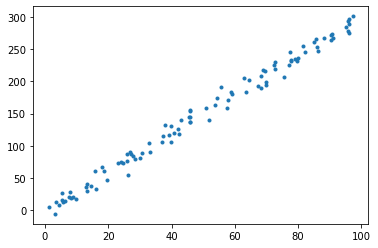

In [30]:
x = np.random.uniform(0., 100., 100)
y = 3. * x + 2. + np.random.normal(0., 10., 100)
plt.plot(x, y, '.')

In [31]:
def line(x, a, b):
    return a * x + b

In [32]:
popt, pcov = curve_fit(line, x, y)

<ErrorbarContainer object of 3 artists>

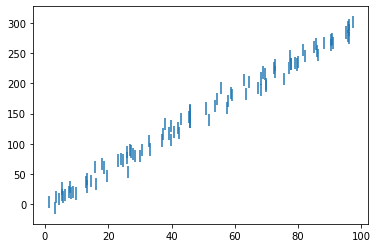

In [33]:
e = np.repeat(10., 100)
plt.errorbar(x, y, yerr=e, fmt="none")

In [34]:
popt, pcov = curve_fit(line, x, y, sigma=e)

In [35]:
print("a =", popt[0], "+/-", pcov[0,0]**0.5)
print("b =", popt[1], "+/-", pcov[1,1]**0.5)

a = 3.0156710186362963 +/- 0.03197497253272882
b = -0.916214597180808 +/- 1.8308755735470867


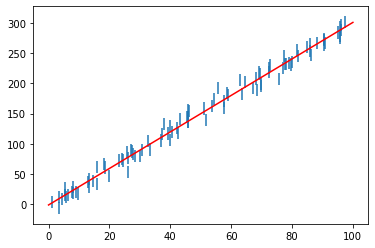

In [36]:
plt.errorbar(x, y, yerr=e, fmt="none")
xfine = np.linspace(0., 100., 100)  # define values to plot the function for
plt.plot(xfine, line(xfine, popt[0], popt[1]), 'r-')

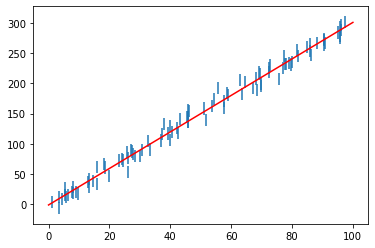

In [37]:
plt.errorbar(x, y, yerr=e, fmt="none")
plt.plot(xfine, line(xfine, *popt), 'r-')

In [ ]:
# https://lmfit.github.io/lmfit-py/model.html

In [ ]:
# https://swharden.com/blog/2020-09-24-python-exponential-fit/

In [ ]:
# the Logarithmic Curve Fitting

In [38]:
import numpy as np

x = np.array([5, 10, 15, 20, 25])
y = np.array([3, 6, 9, 12, 15 ])

log_x = np.log(x)
log_y = np.log(y)

coefficients = np.polyfit(log_x, y, 1)
print(coefficients)

[ 7.2647162  -9.64806344]


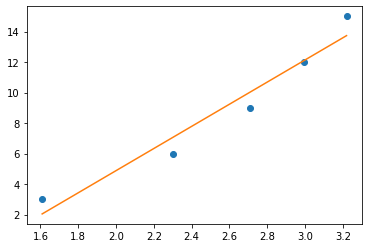

In [39]:
import matplotlib.pyplot as plt

c = 7.26 * log_x - 9.64
plt.plot(log_x, y, "o")
plt.plot(log_x, c)

* In the program above, we first import the necessary libraries. After that, we create two NumPy arrays as our primary data. Then, we calculate the logarithmic values of the elements in both arrays. We use the polyfit() function for both the logarithmic values of the x and y arrays. Using the polyfit() function, the coefficients for the logarithmic equation are returned.

* After getting the coefficients, we use those coefficients on the logarithmic equation for plotting the curve.
* Finally, we plot the graph using the plot() function of the pyplot module of the matplotlib library. 

In [40]:
import numpy as np
a = np.array([6, 12, 18, 24, 30])
b = np.array([4, 8, 12, 16, 20])

log_a = np.log(a)
log_b = np.log(b)

coefficients = np.polyfit(a, log_b, 1)
print(coefficients)

[0.06520038 1.17018581]


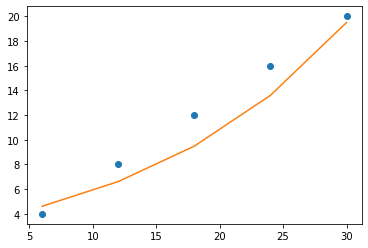

In [41]:
c = np.exp(1.17) * np.exp(0.06*a)
plt.plot(a, b, "o")
plt.plot(a, c)

In [ ]:
# https://www.statology.org/exponential-regression-python/

In [42]:
import numpy as np

x = np.arange(1, 21, 1)
y = np.array([1, 3, 5, 7, 9, 12, 15, 19, 23, 28,
              33, 38, 44, 50, 56, 64, 73, 84, 97, 113])

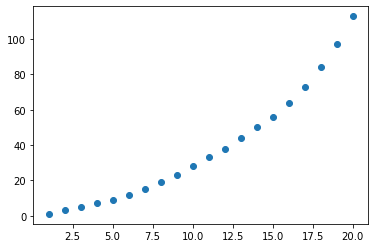

In [43]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

In [ ]:
# Step 3: Fit the Exponential Regression Model

In [ ]:
#fit the model
fit = np.polyfit(x, np.log(y), 1)


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)

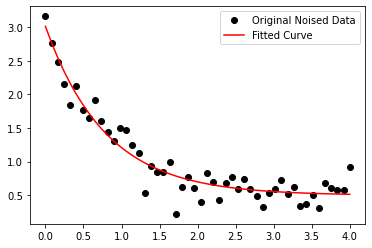

In [45]:
plt.figure()
plt.plot(x, yn, 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [46]:

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import sympy as sym

"""
Generate some data, let's imagine that you already have this. 
"""
x = np.linspace(0, 3, 50)
y = np.exp(x)

"""
Plot your data
"""
plt.plot(x, y, 'ro',label="Original Data")

"""
brutal force to avoid errors
"""    
x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work

"""
create a function to fit with your data. a, b, c and d are the coefficients
that curve_fit will calculate for you. 
In this part you need to guess and/or use mathematical knowledge to find
a function that resembles your data
"""
def func(x, a, b, c, d):
    return a*x**3 + b*x**2 +c*x + d

"""
make the curve_fit
"""
popt, pcov = curve_fit(func, x, y)

"""
The result is:
popt[0] = a , popt[1] = b, popt[2] = c and popt[3] = d of the function,
so f(x) = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3].
"""
print "a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3])

"""
Use sympy to generate the latex sintax of the function
"""
xs = sym.Symbol('\lambda')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

"""
Print the coefficients and plot the funcion.
"""

plt.plot(x, func(x, *popt), label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left')
plt.show()

SyntaxError: invalid syntax (<ipython-input-46-71f920753d8d>, line 42)

In [ ]:
# http://emilygraceripka.com/blog/14